In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from pandas import Series,DataFrame

In [247]:
from sklearn.ensemble import RandomForestRegressor

In [370]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [170]:
df_test=pd.read_excel('D:\\高端用户人选 .xlsx',encoding='kpg')

In [248]:
df_test

,姓名,单位,领域,优势,其它,added_2,added_random,upscending
0,陈景生,新加坡国立大学,凝聚态物理,NaN,NaN,1,0.536560,0
1,王兆奎,苏州大学,钙钛矿太阳能电池,文章多,NaN,0,0.413229,1
2,廖良生,苏州大学,钙钛矿太阳能电池,文章多,NaN,0,0.892981,2
3,曾晓勤,上海交通大学,轻质合金,文章多,NaN,0,0.729343,3
4,马紫峰,上海交通大学,锂电,NaN,NaN,1,0.185003,4
5,沈健,复旦大学,凝聚态物理,NaN,去年未中,2,0.564530,5
6,邓鹤翔,武汉大学,MOF及COF材料,能发nature、science级文章,可能不会共同通讯,3,0.072727,6
7,赵立东,清华大学,热电材料,能发nature、science级文章,可能不会共同通讯,1,0.666139,7
8,马丁,北京大学,催化,能发nature、science级文章,可能不会共同通讯,3,0.264401,8


In [297]:
df_test.loc[1:3,['姓名','优势']]   ####用这种方式前面必须先做行选择，行选择不能省略

,姓名,优势
1,王兆奎,文章多
2,廖良生,文章多
3,曾晓勤,文章多


In [26]:
df_test.loc[0:2,['姓名','单位']]    ####loc表示按名称选择

,姓名,单位
0,陈景生,新加坡国立大学
1,王兆奎,苏州大学
2,廖良生,苏州大学


In [41]:
df_test.iloc[0:2,1:3]      #####iloc表示按照index选择

,单位,领域
0,新加坡国立大学,凝聚态物理
1,苏州大学,钙钛矿太阳能电池


In [58]:
df_arange=pd.DataFrame(np.arange(16).reshape(4,4),index=['a','b','c','d'],columns=['one','two','three','four'])##顺序：数据—index—列

In [59]:
df_arange

,one,two,three,four
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [74]:
a=df_arange.index.values
a

array(['a', 'b', 'c', 'd', '4'], dtype=object)

In [77]:
np.argwhere(a=='c')[0][0]      ####用np.argwhere来提取index

2

In [81]:
b=df_arange.as_matrix()
b

array([[0, 1, 2, 3],
       [4, 5, 6, 7],
       [8, 9, 10, 11],
       [12, 13, 14, 15],
       ['6', '6', '6', '6']], dtype=object)

In [85]:
np.argwhere(b==9)

array([[2, 1]], dtype=int64)

In [96]:
np.argwhere(df_arange.columns=='one')  ####不用values也可以

array([[0]], dtype=int64)

In [98]:
df_arange

,one,two,three,four
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15
4,6,6,6,6


In [102]:
df_arange.loc[5]=[2,4,6,8]   ####用loc表示增加行

In [103]:
df_arange

,one,two,three,four
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15
4,6,6,6,6
5,2,4,6,8


In [104]:
df_arange.index

Index(['a', 'b', 'c', 'd', '4', 5], dtype='object')

In [105]:
df_arange[12]='NNN'   ###不用loc表示增加列，数字不加引号表示列名为数值

In [106]:
df_arange

,one,two,three,four,12
a,0,1,2,3,NNN
b,4,5,6,7,NNN
c,8,9,10,11,NNN
d,12,13,14,15,NNN
4,6,6,6,6,NNN
5,2,4,6,8,NNN


In [107]:
df_arange.drop(5)    ###不加inplace只是表面删除了该行数据，可用来给其它dataframe赋值

,one,two,three,four,12
a,0,1,2,3,NNN
b,4,5,6,7,NNN
c,8,9,10,11,NNN
d,12,13,14,15,NNN
4,6,6,6,6,NNN


In [110]:
df_arange.drop('4',inplace=True)   ####加上inplace表示在原数据中真实删除

In [111]:
df_arange

,one,two,three,four,12
a,0,1,2,3,NNN
b,4,5,6,7,NNN
c,8,9,10,11,NNN
d,12,13,14,15,NNN
5,2,4,6,8,NNN


In [113]:
df_arange.columns

Index(['one', 'two', 'three', 'four', 12], dtype='object')

In [115]:
df_arange.drop([12],axis=1)    ####加上axis=1表示删除列

,one,two,three,four
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15
5,2,4,6,8


In [116]:
df_arange   ####同样没加inplace表示表面删除

,one,two,three,four,12
a,0,1,2,3,NNN
b,4,5,6,7,NNN
c,8,9,10,11,NNN
d,12,13,14,15,NNN
5,2,4,6,8,NNN


In [118]:
df_arange['haha']=np.arange(5)

In [119]:
df_arange

,one,two,three,four,12,haha
a,0,1,2,3,NNN,0
b,4,5,6,7,NNN,1
c,8,9,10,11,NNN,2
d,12,13,14,15,NNN,3
5,2,4,6,8,NNN,4


In [121]:
df_arange.pop('haha')   ####使用pop不用中括号，而且表示真实删除

a    0
b    1
c    2
d    3
5    4
Name: haha, dtype: int32

In [122]:
df_arange

,one,two,three,four,12
a,0,1,2,3,NNN
b,4,5,6,7,NNN
c,8,9,10,11,NNN
d,12,13,14,15,NNN
5,2,4,6,8,NNN


In [128]:
df_1=pd.DataFrame(np.random.rand(12).reshape(4,3),index=np.arange(4),columns=['a','b','c'])
df_1

,a,b,c
0,0.583328,0.163623,0.224272
1,0.599681,0.542695,0.058100
2,0.756870,0.759698,0.661360
3,0.393613,0.819339,0.977913


In [130]:
df_2=pd.DataFrame(np.arange(12).reshape(4,3),index=np.arange(4),columns=['a','b','c'])
df_2

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


In [134]:
pd.concat([df_1,df_2],axis=1)   #####axis=1表示横向接合

,a,b,c,a,b,c
0,0.583328,0.163623,0.224272,0,1,2
1,0.599681,0.542695,0.058100,3,4,5
2,0.756870,0.759698,0.661360,6,7,8
3,0.393613,0.819339,0.977913,9,10,11


In [136]:
pd.concat([df_1,df_2],axis=0)     #####axis=2表示纵向接合

,a,b,c
0,0.583328,0.163623,0.224272
1,0.599681,0.542695,0.058100
2,0.756870,0.759698,0.661360
3,0.393613,0.819339,0.977913
0,0.000000,1.000000,2.000000
1,3.000000,4.000000,5.000000
2,6.000000,7.000000,8.000000
3,9.000000,10.000000,11.000000


In [140]:
df_1

,a,b,c
0,0.583328,0.163623,0.224272
1,0.599681,0.542695,0.058100
2,0.756870,0.759698,0.661360
3,0.393613,0.819339,0.977913


In [147]:
df_1=df_1[['c','b','a']]

In [148]:
df_1

,c,b,a
0,0.224272,0.163623,0.583328
1,0.058100,0.542695,0.599681
2,0.661360,0.759698,0.756870
3,0.977913,0.819339,0.393613


In [151]:
df_1.loc[1,['b']]=3

In [152]:
df_1

,c,b,a
0,0.224272,0.163623,0.583328
1,0.058100,3.000000,0.599681
2,0.661360,0.759698,0.756870
3,0.977913,0.819339,0.393613


In [174]:
df_test

,姓名,单位,领域,优势,其它
0,陈景生,新加坡国立大学,凝聚态物理,NaN,NaN
1,王兆奎,苏州大学,钙钛矿太阳能电池,文章多,NaN
2,廖良生,苏州大学,钙钛矿太阳能电池,文章多,NaN
3,曾晓勤,上海交通大学,轻质合金,文章多,NaN
4,马紫峰,上海交通大学,锂电,NaN,NaN
5,沈健,复旦大学,凝聚态物理,NaN,去年未中
6,邓鹤翔,武汉大学,MOF及COF材料,能发nature、science级文章,可能不会共同通讯
7,赵立东,清华大学,热电材料,能发nature、science级文章,可能不会共同通讯
8,马丁,北京大学,催化,能发nature、science级文章,可能不会共同通讯


In [175]:
df_test['added_2']=np.array([1,0,0,0,1,2,3,1,3])

In [176]:
df_test

,姓名,单位,领域,优势,其它,added_2
0,陈景生,新加坡国立大学,凝聚态物理,NaN,NaN,1
1,王兆奎,苏州大学,钙钛矿太阳能电池,文章多,NaN,0
2,廖良生,苏州大学,钙钛矿太阳能电池,文章多,NaN,0
3,曾晓勤,上海交通大学,轻质合金,文章多,NaN,0
4,马紫峰,上海交通大学,锂电,NaN,NaN,1
5,沈健,复旦大学,凝聚态物理,NaN,去年未中,2
6,邓鹤翔,武汉大学,MOF及COF材料,能发nature、science级文章,可能不会共同通讯,3
7,赵立东,清华大学,热电材料,能发nature、science级文章,可能不会共同通讯,1
8,马丁,北京大学,催化,能发nature、science级文章,可能不会共同通讯,3


In [178]:
df_test['added_random']=np.random.rand(9)

In [179]:
df_test

,姓名,单位,领域,优势,其它,added_2,added_random
0,陈景生,新加坡国立大学,凝聚态物理,NaN,NaN,1,0.536560
1,王兆奎,苏州大学,钙钛矿太阳能电池,文章多,NaN,0,0.413229
2,廖良生,苏州大学,钙钛矿太阳能电池,文章多,NaN,0,0.892981
3,曾晓勤,上海交通大学,轻质合金,文章多,NaN,0,0.729343
4,马紫峰,上海交通大学,锂电,NaN,NaN,1,0.185003
5,沈健,复旦大学,凝聚态物理,NaN,去年未中,2,0.564530
6,邓鹤翔,武汉大学,MOF及COF材料,能发nature、science级文章,可能不会共同通讯,3,0.072727
7,赵立东,清华大学,热电材料,能发nature、science级文章,可能不会共同通讯,1,0.666139
8,马丁,北京大学,催化,能发nature、science级文章,可能不会共同通讯,3,0.264401


In [180]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

In [206]:
df_test.added_2.value_counts()

1    3
0    3
3    2
2    1
Name: added_2, dtype: int64

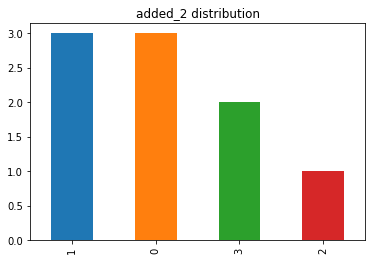

In [208]:
ax=plt.gca()
df_test.added_2.value_counts().plot(kind='bar')     ####用value_counts来计数某值频率
ax.set_title('added_2 distribution')
plt.show()

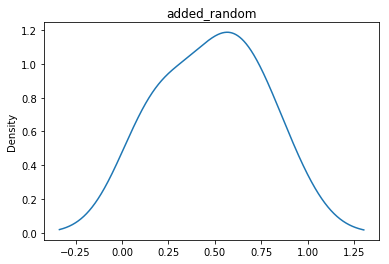

In [185]:
ax=plt.gca()
df_test.added_random.plot(kind='kde')     ####用kde画出密度分布曲线
ax.set_title('added_random')
plt.show()

In [186]:
df_test[df_test.added_2==0]    ###用这种方法找出所有某列为某个值的记录

,姓名,单位,领域,优势,其它,added_2,added_random
1,王兆奎,苏州大学,钙钛矿太阳能电池,文章多,NaN,0,0.413229
2,廖良生,苏州大学,钙钛矿太阳能电池,文章多,NaN,0,0.892981
3,曾晓勤,上海交通大学,轻质合金,文章多,NaN,0,0.729343


In [204]:
df_test[df_test.added_2==0].added_random

1    0.413229
2    0.892981
3    0.729343
Name: added_random, dtype: float64

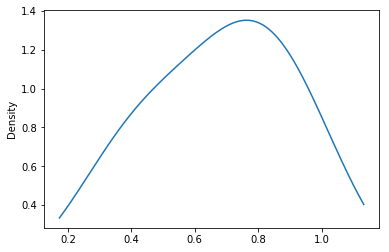

In [196]:
df_test[df_test.added_2==0].added_random.plot(kind='kde')

In [197]:
df_test['upscending']=np.arange(len(df_test.index))

In [209]:
df_test

,姓名,单位,领域,优势,其它,added_2,added_random,upscending
0,陈景生,新加坡国立大学,凝聚态物理,NaN,NaN,1,0.536560,0
1,王兆奎,苏州大学,钙钛矿太阳能电池,文章多,NaN,0,0.413229,1
2,廖良生,苏州大学,钙钛矿太阳能电池,文章多,NaN,0,0.892981,2
3,曾晓勤,上海交通大学,轻质合金,文章多,NaN,0,0.729343,3
4,马紫峰,上海交通大学,锂电,NaN,NaN,1,0.185003,4
5,沈健,复旦大学,凝聚态物理,NaN,去年未中,2,0.564530,5
6,邓鹤翔,武汉大学,MOF及COF材料,能发nature、science级文章,可能不会共同通讯,3,0.072727,6
7,赵立东,清华大学,热电材料,能发nature、science级文章,可能不会共同通讯,1,0.666139,7
8,马丁,北京大学,催化,能发nature、science级文章,可能不会共同通讯,3,0.264401,8


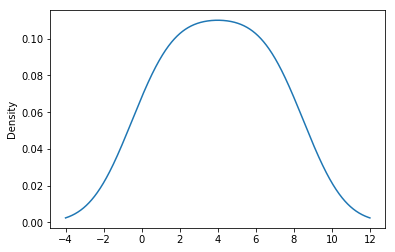

In [199]:
df_test.upscending.plot(kind='kde')

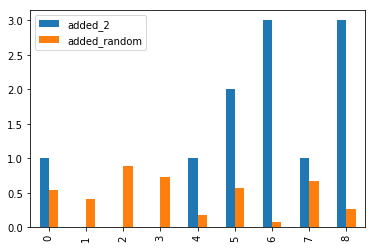

In [203]:
df_test[['added_2','added_random']].plot(kind='bar')

In [210]:
df_test

,姓名,单位,领域,优势,其它,added_2,added_random,upscending
0,陈景生,新加坡国立大学,凝聚态物理,NaN,NaN,1,0.536560,0
1,王兆奎,苏州大学,钙钛矿太阳能电池,文章多,NaN,0,0.413229,1
2,廖良生,苏州大学,钙钛矿太阳能电池,文章多,NaN,0,0.892981,2
3,曾晓勤,上海交通大学,轻质合金,文章多,NaN,0,0.729343,3
4,马紫峰,上海交通大学,锂电,NaN,NaN,1,0.185003,4
5,沈健,复旦大学,凝聚态物理,NaN,去年未中,2,0.564530,5
6,邓鹤翔,武汉大学,MOF及COF材料,能发nature、science级文章,可能不会共同通讯,3,0.072727,6
7,赵立东,清华大学,热电材料,能发nature、science级文章,可能不会共同通讯,1,0.666139,7
8,马丁,北京大学,催化,能发nature、science级文章,可能不会共同通讯,3,0.264401,8


In [299]:
other_null=df_test[df_test.其它.isnull()]    #用isnull或notnull来选择某列空/非空的行
other_null

,姓名,单位,领域,优势,其它,added_2,added_random,upscending
0,陈景生,新加坡国立大学,凝聚态物理,NaN,NaN,1,0.536560,0
1,王兆奎,苏州大学,钙钛矿太阳能电池,文章多,NaN,0,0.413229,1
2,廖良生,苏州大学,钙钛矿太阳能电池,文章多,NaN,0,0.892981,2
3,曾晓勤,上海交通大学,轻质合金,文章多,NaN,0,0.729343,3
4,马紫峰,上海交通大学,锂电,NaN,NaN,1,0.185003,4


In [301]:
advantage_null=df_test[df_test.优势.isnull()]
advantage_null

,姓名,单位,领域,优势,其它,added_2,added_random,upscending
0,陈景生,新加坡国立大学,凝聚态物理,NaN,NaN,1,0.536560,0
4,马紫峰,上海交通大学,锂电,NaN,NaN,1,0.185003,4
5,沈健,复旦大学,凝聚态物理,NaN,去年未中,2,0.564530,5


In [303]:
df_null=pd.concat([other_null,advantage_null],axis=0)           ###直接这样合并会有重复记录
df_null

,姓名,单位,领域,优势,其它,added_2,added_random,upscending
0,陈景生,新加坡国立大学,凝聚态物理,NaN,NaN,1,0.536560,0
1,王兆奎,苏州大学,钙钛矿太阳能电池,文章多,NaN,0,0.413229,1
2,廖良生,苏州大学,钙钛矿太阳能电池,文章多,NaN,0,0.892981,2
3,曾晓勤,上海交通大学,轻质合金,文章多,NaN,0,0.729343,3
4,马紫峰,上海交通大学,锂电,NaN,NaN,1,0.185003,4
0,陈景生,新加坡国立大学,凝聚态物理,NaN,NaN,1,0.536560,0
4,马紫峰,上海交通大学,锂电,NaN,NaN,1,0.185003,4
5,沈健,复旦大学,凝聚态物理,NaN,去年未中,2,0.564530,5


In [325]:
df_drop=df_null.drop_duplicates()    ###用drop_duplicates方法去除重复，也可用drop_duplicates([列名])来去除某列重复的行
df_drop

,姓名,单位,领域,优势,其它,added_2,added_random,upscending
0,陈景生,新加坡国立大学,凝聚态物理,NaN,NaN,1,0.536560,0
1,王兆奎,苏州大学,钙钛矿太阳能电池,文章多,NaN,0,0.413229,1
2,廖良生,苏州大学,钙钛矿太阳能电池,文章多,NaN,0,0.892981,2
3,曾晓勤,上海交通大学,轻质合金,文章多,NaN,0,0.729343,3
4,马紫峰,上海交通大学,锂电,NaN,NaN,1,0.185003,4
5,沈健,复旦大学,凝聚态物理,NaN,去年未中,2,0.564530,5


In [332]:
df_drop['added_more']='yes'
df_drop

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,姓名,单位,领域,优势,其它,added_2,added_random,upscending,added_more
0,陈景生,新加坡国立大学,凝聚态物理,NaN,NaN,1,0.536560,0,yes
1,王兆奎,苏州大学,钙钛矿太阳能电池,文章多,NaN,0,0.413229,1,yes
2,廖良生,苏州大学,钙钛矿太阳能电池,文章多,NaN,0,0.892981,2,yes
3,曾晓勤,上海交通大学,轻质合金,文章多,NaN,0,0.729343,3,yes
4,马紫峰,上海交通大学,锂电,NaN,NaN,1,0.185003,4,yes
5,沈健,复旦大学,凝聚态物理,NaN,去年未中,2,0.564530,5,yes


In [334]:
df_drop['added_more']='no'  ####用这种方法更改某一列数值
df_drop

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,姓名,单位,领域,优势,其它,added_2,added_random,upscending,added_more
0,陈景生,新加坡国立大学,凝聚态物理,NaN,NaN,1,0.536560,0,no
1,王兆奎,苏州大学,钙钛矿太阳能电池,文章多,NaN,0,0.413229,1,no
2,廖良生,苏州大学,钙钛矿太阳能电池,文章多,NaN,0,0.892981,2,no
3,曾晓勤,上海交通大学,轻质合金,文章多,NaN,0,0.729343,3,no
4,马紫峰,上海交通大学,锂电,NaN,NaN,1,0.185003,4,no
5,沈健,复旦大学,凝聚态物理,NaN,去年未中,2,0.564530,5,no


In [354]:
df_drop.loc[(df_drop.优势.isnull()),'added_more']='no'   ####用这种方式来更改满足条件的某列的数值
df_drop

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,姓名,单位,领域,优势,其它,added_2,added_random,upscending,added_more
0,陈景生,新加坡国立大学,凝聚态物理,NaN,NaN,1,0.536560,0,no
1,王兆奎,苏州大学,钙钛矿太阳能电池,文章多,NaN,0,0.413229,1,yes
2,廖良生,苏州大学,钙钛矿太阳能电池,文章多,NaN,0,0.892981,2,yes
3,曾晓勤,上海交通大学,轻质合金,文章多,NaN,0,0.729343,3,yes
4,马紫峰,上海交通大学,锂电,NaN,NaN,1,0.185003,4,no
5,沈健,复旦大学,凝聚态物理,NaN,去年未中,2,0.564530,5,no


In [219]:
df_cp0=df_test.单位[df_test.added_2==0].value_counts()

In [220]:
df_cp1=df_test.单位[df_test.added_2==1].value_counts()

In [221]:
df_cp2=df_test.单位[df_test.added_2==2].value_counts()

In [222]:
df_cp3=df_test.单位[df_test.added_2==3].value_counts()

In [227]:
df_cp1

新加坡国立大学    1
上海交通大学     1
清华大学       1
Name: 单位, dtype: int64

In [229]:
pd.concat([df_cp0,df_cp1,df_cp2,df_cp3],axis=1)

,单位,单位,单位,单位
上海交通大学,1.0,1.0,NaN,NaN
北京大学,NaN,NaN,NaN,1.0
复旦大学,NaN,NaN,1.0,NaN
新加坡国立大学,NaN,1.0,NaN,NaN
武汉大学,NaN,NaN,NaN,1.0
清华大学,NaN,1.0,NaN,NaN
苏州大学,2.0,NaN,NaN,NaN


In [231]:
df_cp=pd.DataFrame({'0_class':df_cp0,'1_class':df_cp1,'2_class':df_cp2,'3_class':df_cp3})###用字典方法实现指定列名称
df_cp

,0_class,1_class,2_class,3_class
上海交通大学,1.0,1.0,NaN,NaN
北京大学,NaN,NaN,NaN,1.0
复旦大学,NaN,NaN,1.0,NaN
新加坡国立大学,NaN,1.0,NaN,NaN
武汉大学,NaN,NaN,NaN,1.0
清华大学,NaN,1.0,NaN,NaN
苏州大学,2.0,NaN,NaN,NaN


In [239]:
df_cp2=pd.DataFrame(df_cp.as_matrix(),index=['shanghai jt u','pku','fdu','sgnu','whu','tsu','szu'],columns=df_cp.columns)
df_cp2

,0_class,1_class,2_class,3_class
shanghai jt u,1.0,1.0,NaN,NaN
pku,NaN,NaN,NaN,1.0
fdu,NaN,NaN,1.0,NaN
sgnu,NaN,1.0,NaN,NaN
whu,NaN,NaN,NaN,1.0
tsu,NaN,1.0,NaN,NaN
szu,2.0,NaN,NaN,NaN


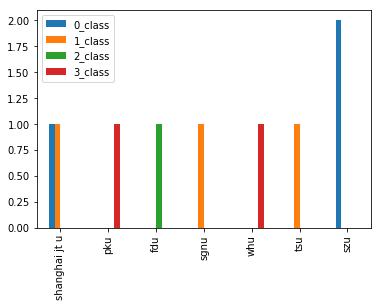

In [240]:
df_cp2.plot(kind='bar')

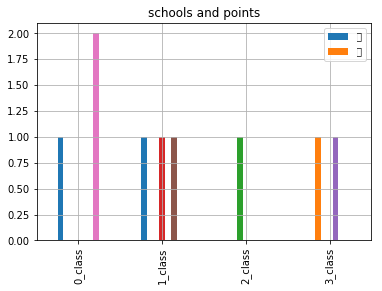

In [246]:
df_cp2.T.plot(kind='bar')
ax=plt.gca()
ax.set_title('schools and points')
plt.legend(u'汉字',loc='best')
plt.grid()

In [355]:
df_drop

,姓名,单位,领域,优势,其它,added_2,added_random,upscending,added_more
0,陈景生,新加坡国立大学,凝聚态物理,NaN,NaN,1,0.536560,0,no
1,王兆奎,苏州大学,钙钛矿太阳能电池,文章多,NaN,0,0.413229,1,yes
2,廖良生,苏州大学,钙钛矿太阳能电池,文章多,NaN,0,0.892981,2,yes
3,曾晓勤,上海交通大学,轻质合金,文章多,NaN,0,0.729343,3,yes
4,马紫峰,上海交通大学,锂电,NaN,NaN,1,0.185003,4,no
5,沈健,复旦大学,凝聚态物理,NaN,去年未中,2,0.564530,5,no


In [358]:
pd.get_dummies(df_drop['added_2'],prefix='added_more')####get_dummies的用法，perfix表示前缀，前面那个是选择的列数据

,added_more_0,added_more_1,added_more_2
0,0,1,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
5,0,0,1


In [362]:
df_drop.filter(regex='领域|added_.*')   ####filter的用法，注意regex（正则）后面引号将所有关键词引入，不用每个词一个引号，词间用管道符隔开

,领域,added_2,added_random,added_more
0,凝聚态物理,1,0.536560,no
1,钙钛矿太阳能电池,0,0.413229,yes
2,钙钛矿太阳能电池,0,0.892981,yes
3,轻质合金,0,0.729343,yes
4,锂电,1,0.185003,no
5,凝聚态物理,2,0.564530,no


In [324]:
'''下面开始学习RangdomForestRegressor
后面还需要学到的重要知识：rfr.fit,rfr.predict
sklearn.processing.standardscaler:transform
linear_model.LogisticRegression
cross_validation
learning_curve
BaggingRegressor
'''

'下面开始学习RangdomForestRegressor\n\n\n'

In [308]:
data=[[0,0,0],[1,1,1],[2,2,2]]
data

[[0, 0, 0], [1, 1, 1], [2, 2, 2]]

In [309]:
target=[0,1,2]

In [321]:
rfr=RandomForestRegressor(n_estimators=1000)

In [322]:
rfr.fit(data,target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [323]:
rfr.predict([[0,0,0],[1,1,1],[2,2,2]])

array([0.322, 0.8  , 1.653])

In [363]:
range(3,14,2)

range(3, 14, 2)

In [369]:
np.linspace(4,14,2).size

2